In [93]:
import pandas as pd
import yfinance as yf

In [94]:
stock = 'MC.PA' # Modify the ticker here
ticker = yf.Ticker(stock)
data = ticker.history(period='10y')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-13 00:00:00+02:00,134.864760,136.373504,134.864760,135.786774,1274659,0.0,0.0
2015-07-14 00:00:00+02:00,135.535330,136.373520,134.319957,136.373520,626028,0.0,0.0
2015-07-15 00:00:00+02:00,136.415444,136.583079,135.116247,135.367706,838607,0.0,0.0
2015-07-16 00:00:00+02:00,136.205889,137.966094,135.786794,136.038254,1503743,0.0,0.0
2015-07-17 00:00:00+02:00,136.624988,140.061573,136.331617,139.935837,1186561,0.0,0.0


In [95]:
data.to_csv(f'{stock}.csv')

In [96]:
df = pd.read_csv(f'{stock}.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-07-13 00:00:00+02:00,134.864760,136.373504,134.864760,135.786774,1274659,0.0,0.0
2015-07-14 00:00:00+02:00,135.535330,136.373520,134.319957,136.373520,626028,0.0,0.0
2015-07-15 00:00:00+02:00,136.415444,136.583079,135.116247,135.367706,838607,0.0,0.0
2015-07-16 00:00:00+02:00,136.205889,137.966094,135.786794,136.038254,1503743,0.0,0.0
2015-07-17 00:00:00+02:00,136.624988,140.061573,136.331617,139.935837,1186561,0.0,0.0


In [97]:
df['daily_return'] = df['Close'].pct_change()
df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50
Date,,,,,,,,,,
2015-07-13 00:00:00+02:00,134.864760,136.373504,134.864760,135.786774,1274659,0.0,0.0,NaN,NaN,NaN
2015-07-14 00:00:00+02:00,135.535330,136.373520,134.319957,136.373520,626028,0.0,0.0,0.004321,NaN,NaN
2015-07-15 00:00:00+02:00,136.415444,136.583079,135.116247,135.367706,838607,0.0,0.0,-0.007375,NaN,NaN
2015-07-16 00:00:00+02:00,136.205889,137.966094,135.786794,136.038254,1503743,0.0,0.0,0.004954,NaN,NaN
2015-07-17 00:00:00+02:00,136.624988,140.061573,136.331617,139.935837,1186561,0.0,0.0,0.028651,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00+02:00,478.000000,479.149994,470.600006,475.350006,327388,0.0,0.0,-0.004190,462.302498,479.657999
2025-07-08 00:00:00+02:00,474.750000,484.899994,472.850006,482.649994,417527,0.0,0.0,0.015357,462.692497,479.270999
2025-07-09 00:00:00+02:00,483.350006,489.600006,479.649994,487.850006,459382,0.0,0.0,0.010774,463.554997,479.242000


In [98]:
df['signal'] = (df['SMA_20'] > df['SMA_50']).astype(int)
df['position'] = df['signal'].shift(1)
df['strategy_return'] = df['daily_return'] * df['position']
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50,signal,position,strategy_return
Date,,,,,,,,,,,,,
2015-07-13 00:00:00+02:00,134.864760,136.373504,134.864760,135.786774,1274659,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN
2015-07-14 00:00:00+02:00,135.535330,136.373520,134.319957,136.373520,626028,0.0,0.0,0.004321,NaN,NaN,0,0.0,0.0
2015-07-15 00:00:00+02:00,136.415444,136.583079,135.116247,135.367706,838607,0.0,0.0,-0.007375,NaN,NaN,0,0.0,-0.0
2015-07-16 00:00:00+02:00,136.205889,137.966094,135.786794,136.038254,1503743,0.0,0.0,0.004954,NaN,NaN,0,0.0,0.0
2015-07-17 00:00:00+02:00,136.624988,140.061573,136.331617,139.935837,1186561,0.0,0.0,0.028651,NaN,NaN,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00+02:00,478.000000,479.149994,470.600006,475.350006,327388,0.0,0.0,-0.004190,462.302498,479.657999,0,0.0,-0.0
2025-07-08 00:00:00+02:00,474.750000,484.899994,472.850006,482.649994,417527,0.0,0.0,0.015357,462.692497,479.270999,0,0.0,0.0
2025-07-09 00:00:00+02:00,483.350006,489.600006,479.649994,487.850006,459382,0.0,0.0,0.010774,463.554997,479.242000,0,0.0,0.0


In [99]:
# compare buy_and_hold vs SMA_strategy
capital = 100_000
df['buy_and_hold_pnl'] = capital * (1 + df['daily_return']).cumprod()
df['SMA_strategy_pnl'] = capital * (1 + df['strategy_return']).cumprod()
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,SMA_20,SMA_50,signal,position,strategy_return,buy_and_hold_pnl,SMA_strategy_pnl
Date,,,,,,,,,,,,,,,
2015-07-13 00:00:00+02:00,134.864760,136.373504,134.864760,135.786774,1274659,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2015-07-14 00:00:00+02:00,135.535330,136.373520,134.319957,136.373520,626028,0.0,0.0,0.004321,NaN,NaN,0,0.0,0.0,100432.108518,100000.000000
2015-07-15 00:00:00+02:00,136.415444,136.583079,135.116247,135.367706,838607,0.0,0.0,-0.007375,NaN,NaN,0,0.0,-0.0,99691.378349,100000.000000
2015-07-16 00:00:00+02:00,136.205889,137.966094,135.786794,136.038254,1503743,0.0,0.0,0.004954,NaN,NaN,0,0.0,0.0,100185.202208,100000.000000
2015-07-17 00:00:00+02:00,136.624988,140.061573,136.331617,139.935837,1186561,0.0,0.0,0.028651,NaN,NaN,0,0.0,0.0,103055.572349,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07 00:00:00+02:00,478.000000,479.149994,470.600006,475.350006,327388,0.0,0.0,-0.004190,462.302498,479.657999,0,0.0,-0.0,350070.918702,421959.644791
2025-07-08 00:00:00+02:00,474.750000,484.899994,472.850006,482.649994,417527,0.0,0.0,0.015357,462.692497,479.270999,0,0.0,0.0,355446.985601,421959.644791
2025-07-09 00:00:00+02:00,483.350006,489.600006,479.649994,487.850006,459382,0.0,0.0,0.010774,463.554997,479.242000,0,0.0,0.0,359276.528101,421959.644791


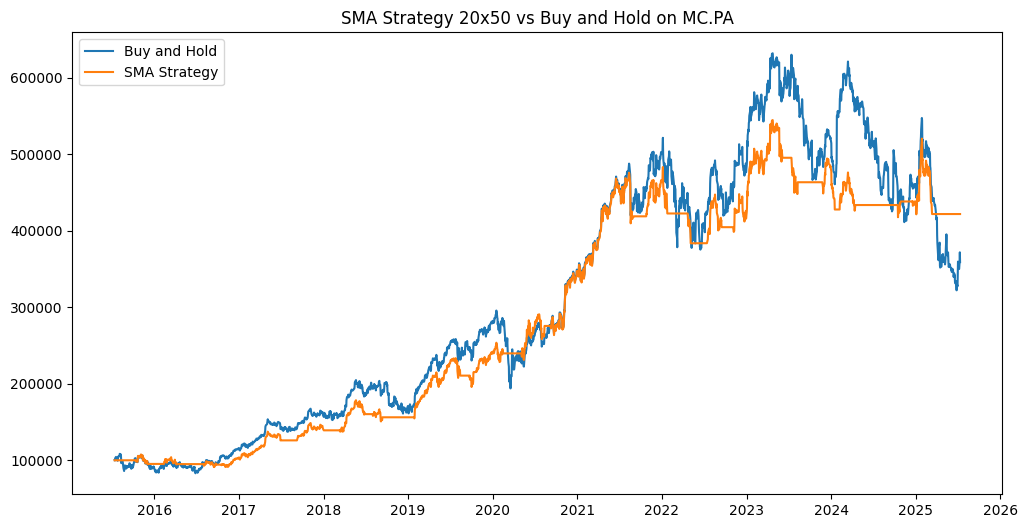

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['buy_and_hold_pnl'], label='Buy and Hold')
plt.plot(df['SMA_strategy_pnl'], label='SMA Strategy')
plt.title(f'SMA Strategy 20x50 vs Buy and Hold on {stock}')
plt.legend()
plt.show()

In [101]:
# Calculate SMA strategy metrics
df['cumulative_return'] = (1 + df['strategy_return']).cumprod()
cumulated_return_sma = df['cumulative_return'].iloc[-1] - 1
ann_return_sma = (1 + cumulated_return_sma) ** (252 / len(df)) - 1
volatility_sma = df['strategy_return'].std() * (252 ** 0.5)
risk_adjusted_return_sma = ann_return_sma / volatility_sma

# Calculate Buy and Hold strategy metrics
df['buy_and_hold_return'] = (1 + df['daily_return']).cumprod()
cumulated_return_bh = df['buy_and_hold_return'].iloc[-1] - 1
ann_return_bh = (1 + cumulated_return_bh) ** (252 / len(df)) - 1
volatility_bh = df['daily_return'].std() * (252 ** 0.5)
risk_adjusted_return_bh = ann_return_bh / volatility_bh

# Max DD SMA
window = 1000
roll_max = df['cumulative_return'].rolling(window, min_periods=1).max()
daily_dd_sma = df['cumulative_return'] / roll_max - 1
max_dd_sma = daily_dd_sma.min()

# Max DD BH
roll_max_bh = df['buy_and_hold_return'].rolling(window, min_periods=1).max()
daily_dd_bh = df['buy_and_hold_return'] / roll_max_bh - 1
max_dd_bh = daily_dd_bh.min()

# Print SMA strategy metrics
print("SMA Strategy Metrics:")
print(f'Cumulated return: {cumulated_return_sma:.2%}')
print(f'Annualized return: {ann_return_sma:.2%}')
print(f'Volatility: {volatility_sma:.2%}')
print(f'Risk adjusted return: {risk_adjusted_return_sma:.2f}')
print(f"Max Drawdown: {max_dd_sma:.2%}")

# Print BH strategy metrics
print("\nBuy and Hold Strategy Metrics:")
print(f'Cumulated return: {cumulated_return_bh:.2%}')
print(f'Annualized return: {ann_return_bh:.2%}')
print(f'Volatility: {volatility_bh:.2%}')
print(f'Risk adjusted return: {risk_adjusted_return_bh:.2f}')
print(f"Max Drawdown: {max_dd_bh:.2%}")

SMA Strategy Metrics:
Cumulated return: 321.96%
Annualized return: 15.21%
Volatility: 18.42%
Risk adjusted return: 0.83
Max Drawdown: -23.32%

Buy and Hold Strategy Metrics:
Cumulated return: 259.17%
Annualized return: 13.40%
Volatility: 28.00%
Risk adjusted return: 0.48
Max Drawdown: -49.03%
